In [ ]:
# This code is adapted from a tutorial on GeeksforGeeks.
# The original work can be found at: https://www.geeksforgeeks.org/
# I have made modifications to the code for personal learning and improvements.

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
'exec(% matplotlib inline)'
import scipy.optimize as opt
import statsmodels.api as sm
import seaborn as sns

### Dataset

#### Loading the dataset

In [3]:
disease_df=pd.read_csv("framingham.csv")
disease_df.drop(['education'],inplace=True, axis=1)
disease_df.rename(columns={'male':'Sex_male'},inplace=True)

#### Handling Missing Values

In [ ]:
#Removing Null/NaN values
disease_df.dropna(axis=0,inplace=True)
print(disease_df.head(),disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

#### Splitting dataset into training and testing

In [9]:
X=np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(disease_df['TenYearCHD'])

#normalization of dataset
X=preprocessing.StandardScaler().fit(X).transform(X)

#Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print('Train Set: ',X_train.shape, y_train.shape)
print('Test Set: ',X_test.shape, y_test.shape)

Train Set:  (2625, 6) (2625,)
Test Set:  (1126, 6) (1126,)


### Ten Year’s CHD Record of all the patients available in the dataset:

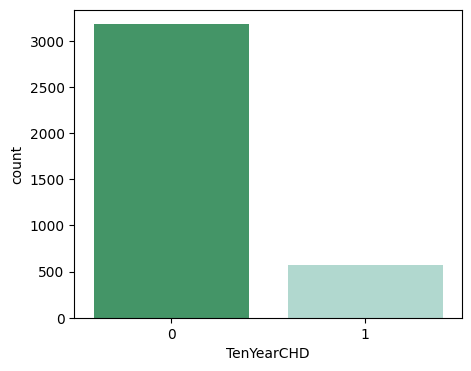

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='TenYearCHD',hue='TenYearCHD',data=disease_df, palette="BuGn_r",legend=False)

plt.show()

### Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

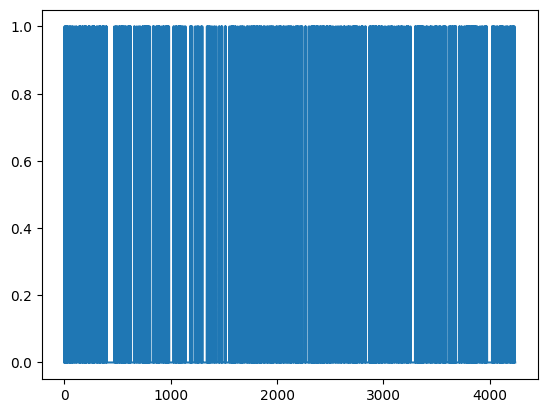

In [16]:
laste=disease_df['TenYearCHD'].plot()
plt.show(laste)

## Fitting Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

### Evaluating Logistic Regression Model

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy of this model is ", accuracy_score(y_test, y_pred))

Accuracy of this model is  0.8339253996447602
